In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
# Load the dataset (change the path to your local dataset)
data = pd.read_csv('events.csv')

In [ ]:
# Select a subset of the dataset to make it smaller
data = data.sample(frac=0.05, random_state=42)  # Using 5% of the data for simplicity

In [ ]:
# Preprocess the dataset
data = data.dropna()  # Drop rows with missing values

In [ ]:
# Extract necessary features and target
data['event_timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data['day'] = data['event_timestamp'].dt.day
data['month'] = data['event_timestamp'].dt.month
data['year'] = data['event_timestamp'].dt.year
data['hour'] = data['event_timestamp'].dt.hour

In [ ]:
# Select relevant columns for features and target
X = data[['itemid', 'categoryid', 'day', 'month', 'year', 'hour']]
y = data['visitorid']  # Assuming 'visitorid' as the target for demonstration

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Load the dataset
stock_data = pd.read_csv("/content/Stock.csv")

# Select relevant features for the model
features = ['adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
target = 'adjClose'

# Drop rows with missing values
stock_data = stock_data.dropna(subset=features + [target])

# Split the data into training and testing sets
X = stock_data[features]
y = stock_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

# Define the parameter grid for Ridge Regression
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0],
    'poly_features__degree': [1, 2, 3]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Save the best model
joblib.dump(best_model, 'improved_stock_model.pkl')

['improved_stock_model.pkl']

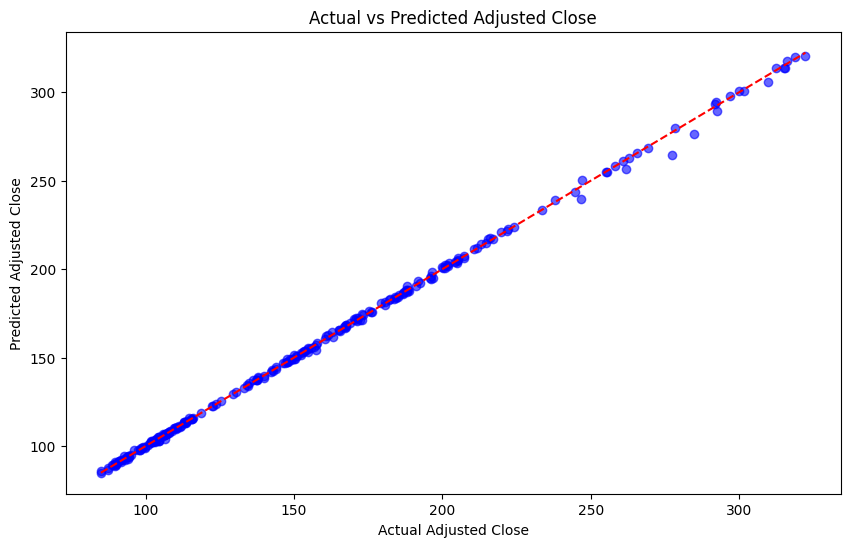

In [10]:
# Predictions on the test set
y_test_pred = best_model.predict(X_test)

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Adjusted Close')
plt.ylabel('Predicted Adjusted Close')
plt.title('Actual vs Predicted Adjusted Close')
plt.show()